## Best-MLP

A better performing Multi-Layered Perceptron found by performing grid search to find the
best combination of hyper-parameters. For this, I experiment with the following parameter
values:

- activation function: sigmoid, tanh, relu and identity
- 2 network architectures of your choice: for eg 2 hidden layers with 30+50 nodes, 3 hidden layers
with 10+10
- solver: Adam and stochastic gradient descent

We start by importing the libraries.

In [16]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

from utils import config
from utils import ProcessDataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Loading Latin and Greek train and val data.

The data consists of 1025 columns, 1024 columns for each pixel and 1 row specifying the character it represents.

In [13]:
Latin_Train = np.array(ProcessDataset.get_DataFromCSV(config.LATIN_TRAIN_SET))
Latin_X_Train = Latin_Train[:,0:1024]
Latin_Y_Train = Latin_Train[:,1024]
Latin_Val = np.array(ProcessDataset.get_DataFromCSV(config.LATIN_DATA_VAL))
Latin_X_Val = Latin_Val[:,0:1024]
Latin_Y_Val = Latin_Val[:,1024]

Greek_Train = np.array(ProcessDataset.get_DataFromCSV(config.GREEK_TRAIN_SET))
Greek_X_Train = Greek_Train[:,0:1024]
Greek_Y_Train = Greek_Train[:,1024]
Greek_Val = np.array(ProcessDataset.get_DataFromCSV(config.GREEK_DATA_VAL))
Greek_X_Val = Greek_Val[:,0:1024]
Greek_Y_Val = Greek_Val[:,1024]

### Experimenting with different MLP parameters

- activation function: sigmoid, tanh, relu and identity
- 2 network architectures of your choice: for eg 2 hidden layers with 30+50 nodes, 3 hidden layers
with 10+10
- solver: Adam and stochastic gradient descent

From the geometric pyramid rule proposed by Masters, a rule for 3 hidden layers is $\sqrt{n}{m}$ where n is the input neurons and m the output neurons. Since there are 26 classes for lating and 10 classes for greek, we decided to try out a 3 hidden layer network of 26 neurons and 10 neurons.

In [3]:
parameters = {'activation': ['identity', 'logistic', 'tanh', 'relu'],
              'hidden_layer_sizes': [(26,26,26), (20,30)], 
              'solver':['adam','sgd']}
clf_latin = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)

parameters = {'activation': ['identity', 'logistic', 'tanh', 'relu'],
              'hidden_layer_sizes': [(10,10,10), (20,30)], 
              'solver':['adam','sgd']}
clf_greek = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)

### Training the mlp model

The GridSearch will find the best combination of parameters that yield the best results. This can take quite some time as it is trying out every combination.

In [4]:
clf_latin.fit(Latin_X_Train, Latin_Y_Train)

clf_greek.fit(Greek_X_Train, Greek_Y_Train)

/home/niyon/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/niyon/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(10, 10, 10), (20, 30)],
                         'solver': ['adam', 'sgd']})

## Validating the model with K-Fold Cross-Validation

In [17]:
kfold = KFold(n_splits=10, random_state=100)

results_kfold = cross_val_score(clf_latin, Latin_X_Val, Latin_Y_Val, cv=kfold)
print("Accuracy of latin perceptron: %.2f%%" % (results_kfold.mean()*100.0)) 

results_kfold = cross_val_score(clf_greek, Greek_X_Val, Greek_Y_Val, cv=kfold)
print("Accuracy of greek perceptron: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy of latin perceptron: 54.66%
Accuracy of greek perceptron: 82.48%


As we can see the accuracy is way better than than the BASE-MLP model.

## Predicting new values

First we load the test dataset and then use the model to predict what character they are.

In [5]:
Latin_X_Test = np.array(ProcessDataset.get_DataFromCSV(config.LATIN_TEST_NOLABEL))
Latin_Y_Test = np.array(ProcessDataset.get_DataFromCSV(config.LATIN_TEST_LABEL))[:,1024]

Greek_X_Test = np.array(ProcessDataset.get_DataFromCSV(config.GREEK_TEST_NOLABEL))
Greek_Y_Test = np.array(ProcessDataset.get_DataFromCSV(config.GREEK_TEST_LABEL))[:,1024]

In [6]:
Latin_Y_Pred = clf_latin.predict(Latin_X_Test)
pd.DataFrame(Latin_Y_Pred).to_csv("./Output/BEST-MLP-DS1.csv", header=None)

Greek_Y_Pred = clf_greek.predict(Greek_X_Test)
pd.DataFrame(Greek_Y_Pred).to_csv("./Output/BEST-MLP-DS2.csv", header=None)

## Finding out how accurate our model is

### 1. Confusion Matrix

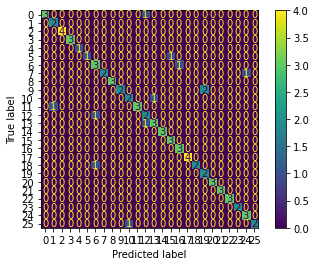

In [7]:
plot_confusion_matrix(clf_latin, Latin_X_Test, Latin_Y_Test)
plt.show()

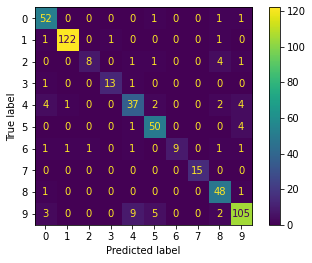

In [8]:
plot_confusion_matrix(clf_greek, Greek_X_Test, Greek_Y_Test)
plt.show()

### 2. Precision, recall, and f1-measure for each class

In [9]:
ProcessDataset.calculate_PRF(Latin_Y_Test, Latin_Y_Pred)

,precision,recall,f1
0,1.000000,0.750000,0.857143
1,0.666667,1.000000,0.800000
2,1.000000,1.000000,1.000000
3,1.000000,1.000000,1.000000
4,1.000000,1.000000,1.000000
5,1.000000,0.500000,0.666667
6,0.600000,0.750000,0.666667
7,1.000000,0.666667,0.800000
8,1.000000,1.000000,1.000000
9,1.000000,0.500000,0.666667


In [10]:
ProcessDataset.calculate_PRF(Greek_Y_Test, Greek_Y_Pred)

,precision,recall,f1
0,0.825397,0.945455,0.881356
1,0.983871,0.976000,0.979920
2,0.888889,0.533333,0.666667
3,0.928571,0.866667,0.896552
4,0.740000,0.740000,0.740000
5,0.847458,0.909091,0.877193
6,1.000000,0.600000,0.750000
7,1.000000,1.000000,1.000000
8,0.813559,0.960000,0.880734
9,0.897436,0.846774,0.871369


### 3. Accuracy, macro-average f1 and weighted-average f1 of the model

#### Perceptron model on DS1

In [11]:
print("Accuracy of perceptron model on DS1: " + str(accuracy_score(Latin_Y_Test, Latin_Y_Pred)*100)+"%")
f1_score(Latin_Y_Test, Latin_Y_Pred, average='macro')
print("Macro-average f1 of perceptron model on DS1: " + str(f1_score(Latin_Y_Test, Latin_Y_Pred, average='macro')*100)+"%")
print("Weighted-average f1 of perceptron model on DS1: " + str(f1_score(Latin_Y_Test, Latin_Y_Pred, average='weighted')*100)+"%")

Accuracy of perceptron model on DS1: 84.81012658227847%
Macro-average f1 of perceptron model on DS1: 85.15567765567766%
Weighted-average f1 of perceptron model on DS1: 84.91862567811935%


#### Perceptron model on DS2

In [12]:
print("Accuracy of perceptron model on DS1: " + str(accuracy_score(Greek_Y_Test, Greek_Y_Pred)*100)+"%")
f1_score(Latin_Y_Test, Latin_Y_Pred, average='macro')
print("Macro-average f1 of perceptron model on DS1: " + str(f1_score(Greek_Y_Test, Greek_Y_Pred, average='macro')*100)+"%")
print("Weighted-average f1 of perceptron model on DS1: " + str(f1_score(Greek_Y_Test, Greek_Y_Pred, average='weighted')*100)+"%")

Accuracy of perceptron model on DS1: 88.4393063583815%
Macro-average f1 of perceptron model on DS1: 85.43790223738925%
Weighted-average f1 of perceptron model on DS1: 88.24564851378177%


## Conclusion

As we can see, the accuracy of the model greatly improved from the BASE-MLP.